# Assignment 2 - Wine Data
Group Number 7
* Angelina Buysse
* Pranav Ramasahayam
* William Reimer
* Austin Rollfing
---
### Summary Of Results

i. Wine **DataFrame** shape: 178 x 14

ii. Data set shape: 178 x 13

iii. Target set shape: 178 x 1

iv. Strongest correlation with target:
1. 'flavanoids' (-0.847498)
2. 'od280/od315_of_diluted_wines' (-0.788230)
3. 'total_phenols' (-0.719163)

The K-Nearest Neighbors model implemented in this assignment performed very well. Using 33% of the dataset for testing, only a singular error was made by the classifier out of 59 predictions. 

The key performance metrics for the model are below, showing strong performance:
* Accuracy: 0.9831
* Precision: 0.9841
* Recall: 0.9861
* F1: 0.9848

---

First, all necessary libraries are imported.

In [433]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns

The wine dataset is loaded and split into data (*X*), targets (*y*), and read as a *pandas* **DataFrame**.

In [434]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target
frame = wine.frame

Next, an overview of the frame using **DataFrame.info()**.

In [435]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Then, an overview of the data and target set, again using **DataFrame.info()**.

In [436]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [437]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: target
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


**DataFrame.describe()** can be used to get min, max, mean, etc. for each feature.

In [438]:
frame.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

The frame can be split by the target class, and **DataFrame.describe()** can be used on each resulting frame to get the same statistics for each class.

In [439]:
target_0 = frame.loc[frame.target == 0]
target_1 = frame.loc[frame.target == 1]
target_2 = frame.loc[frame.target == 2]

In [440]:
target_0.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  59.000000   59.000000  59.000000          59.000000   59.000000   
mean   13.744746    2.010678   2.455593          17.037288  106.338983   
std     0.462125    0.688549   0.227166           2.546322   10.498949   
min    12.850000    1.350000   2.040000          11.200000   89.000000   
25%    13.400000    1.665000   2.295000          16.000000   98.000000   
50%    13.750000    1.770000   2.440000          16.800000  104.000000   
75%    14.100000    1.935000   2.615000          18.700000  114.000000   
max    14.830000    4.040000   3.220000          25.000000  132.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.840169    2.982373              0.290000         1.899322   
std         0.338961    0.397494              0.070049         0.412109   
min         2.200000    2.190000              0.170000         1.250000   
25%         2.600000    2.680000              0.255000         1.640000   
50%         2.800000    2.980000              0.290000         1.870000   
75%         3.000000    3.245000              0.320000         2.090000   
max         3.880000    3.930000              0.500000         2.960000   

       color_intensity        hue  od280/od315_of_diluted_wines      proline  \
count        59.000000  59.000000                     59.000000    59.000000   
mean          5.528305   1.062034                      3.157797  1115.711864   
std           1.238573   0.116483                      0.357077   221.520767   
min           3.520000   0.820000                      2.510000   680.000000   
25%           4.550000   0.995000                      2.870000   987.500000   
50%           5.400000   1.070000                      3.170000  1095.000000   
75%           6.225000   1.130000                      3.420000  1280.000000   
max           8.900000   1.280000                      4.000000  1680.000000   

       target  
count    59.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

In [441]:
target_1.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  71.000000   71.000000  71.000000          71.000000   71.000000   
mean   12.278732    1.932676   2.244789          20.238028   94.549296   
std     0.537964    1.015569   0.315467           3.349770   16.753497   
min    11.030000    0.740000   1.360000          10.600000   70.000000   
25%    11.915000    1.270000   2.000000          18.000000   85.500000   
50%    12.290000    1.610000   2.240000          20.000000   88.000000   
75%    12.515000    2.145000   2.420000          22.000000   99.500000   
max    13.860000    5.800000   3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      71.000000   71.000000             71.000000        71.000000   
mean        2.258873    2.080845              0.363662         1.630282   
std         0.545361    0.705701              0.123961         0.602068   
min         1.100000    0.570000              0.130000         0.410000   
25%         1.895000    1.605000              0.270000         1.350000   
50%         2.200000    2.030000              0.370000         1.610000   
75%         2.560000    2.475000              0.430000         1.885000   
max         3.520000    5.080000              0.660000         3.580000   

       color_intensity        hue  od280/od315_of_diluted_wines     proline  \
count        71.000000  71.000000                     71.000000   71.000000   
mean          3.086620   1.056282                      2.785352  519.507042   
std           0.924929   0.202937                      0.496573  157.211220   
min           1.280000   0.690000                      1.590000  278.000000   
25%           2.535000   0.925000                      2.440000  406.500000   
50%           2.900000   1.040000                      2.830000  495.000000   
75%           3.400000   1.205000                      3.160000  625.000000   
max           6.000000   1.710000                      3.690000  985.000000   

       target  
count    71.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0

In [442]:
target_2.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  48.000000   48.000000  48.000000          48.000000   48.000000   
mean   13.153750    3.333750   2.437083          21.416667   99.312500   
std     0.530241    1.087906   0.184690           2.258161   10.890473   
min    12.200000    1.240000   2.100000          17.500000   80.000000   
25%    12.805000    2.587500   2.300000          20.000000   89.750000   
50%    13.165000    3.265000   2.380000          21.000000   97.000000   
75%    13.505000    3.957500   2.602500          23.000000  106.000000   
max    14.340000    5.650000   2.860000          27.000000  123.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      48.000000   48.000000              48.00000        48.000000   
mean        1.678750    0.781458               0.44750         1.153542   
std         0.356971    0.293504               0.12414         0.408836   
min         0.980000    0.340000               0.17000         0.550000   
25%         1.407500    0.580000               0.39750         0.855000   
50%         1.635000    0.685000               0.47000         1.105000   
75%         1.807500    0.920000               0.53000         1.350000   
max         2.800000    1.570000               0.63000         2.700000   

       color_intensity        hue  od280/od315_of_diluted_wines     proline  \
count        48.000000  48.000000                     48.000000   48.000000   
mean          7.396250   0.682708                      1.683542  629.895833   
std           2.310942   0.114441                      0.272111  115.097043   
min           3.850000   0.480000                      1.270000  415.000000   
25%           5.437500   0.587500                      1.510000  545.000000   
50%           7.550000   0.665000                      1.660000  627.500000   
75%           9.225000   0.752500                      1.820000  695.000000   
max          13.000000   0.960000                      2.470000  880.000000   

       target  
count    48.0  
mean      2.0  
std       0.0  
min       2.0  
25%       2.0  
50%       2.0  
75%       2.0  
max       2.0

*pandas*' **scatter_matrix()** function can be used to visualize the correlations between each feature.

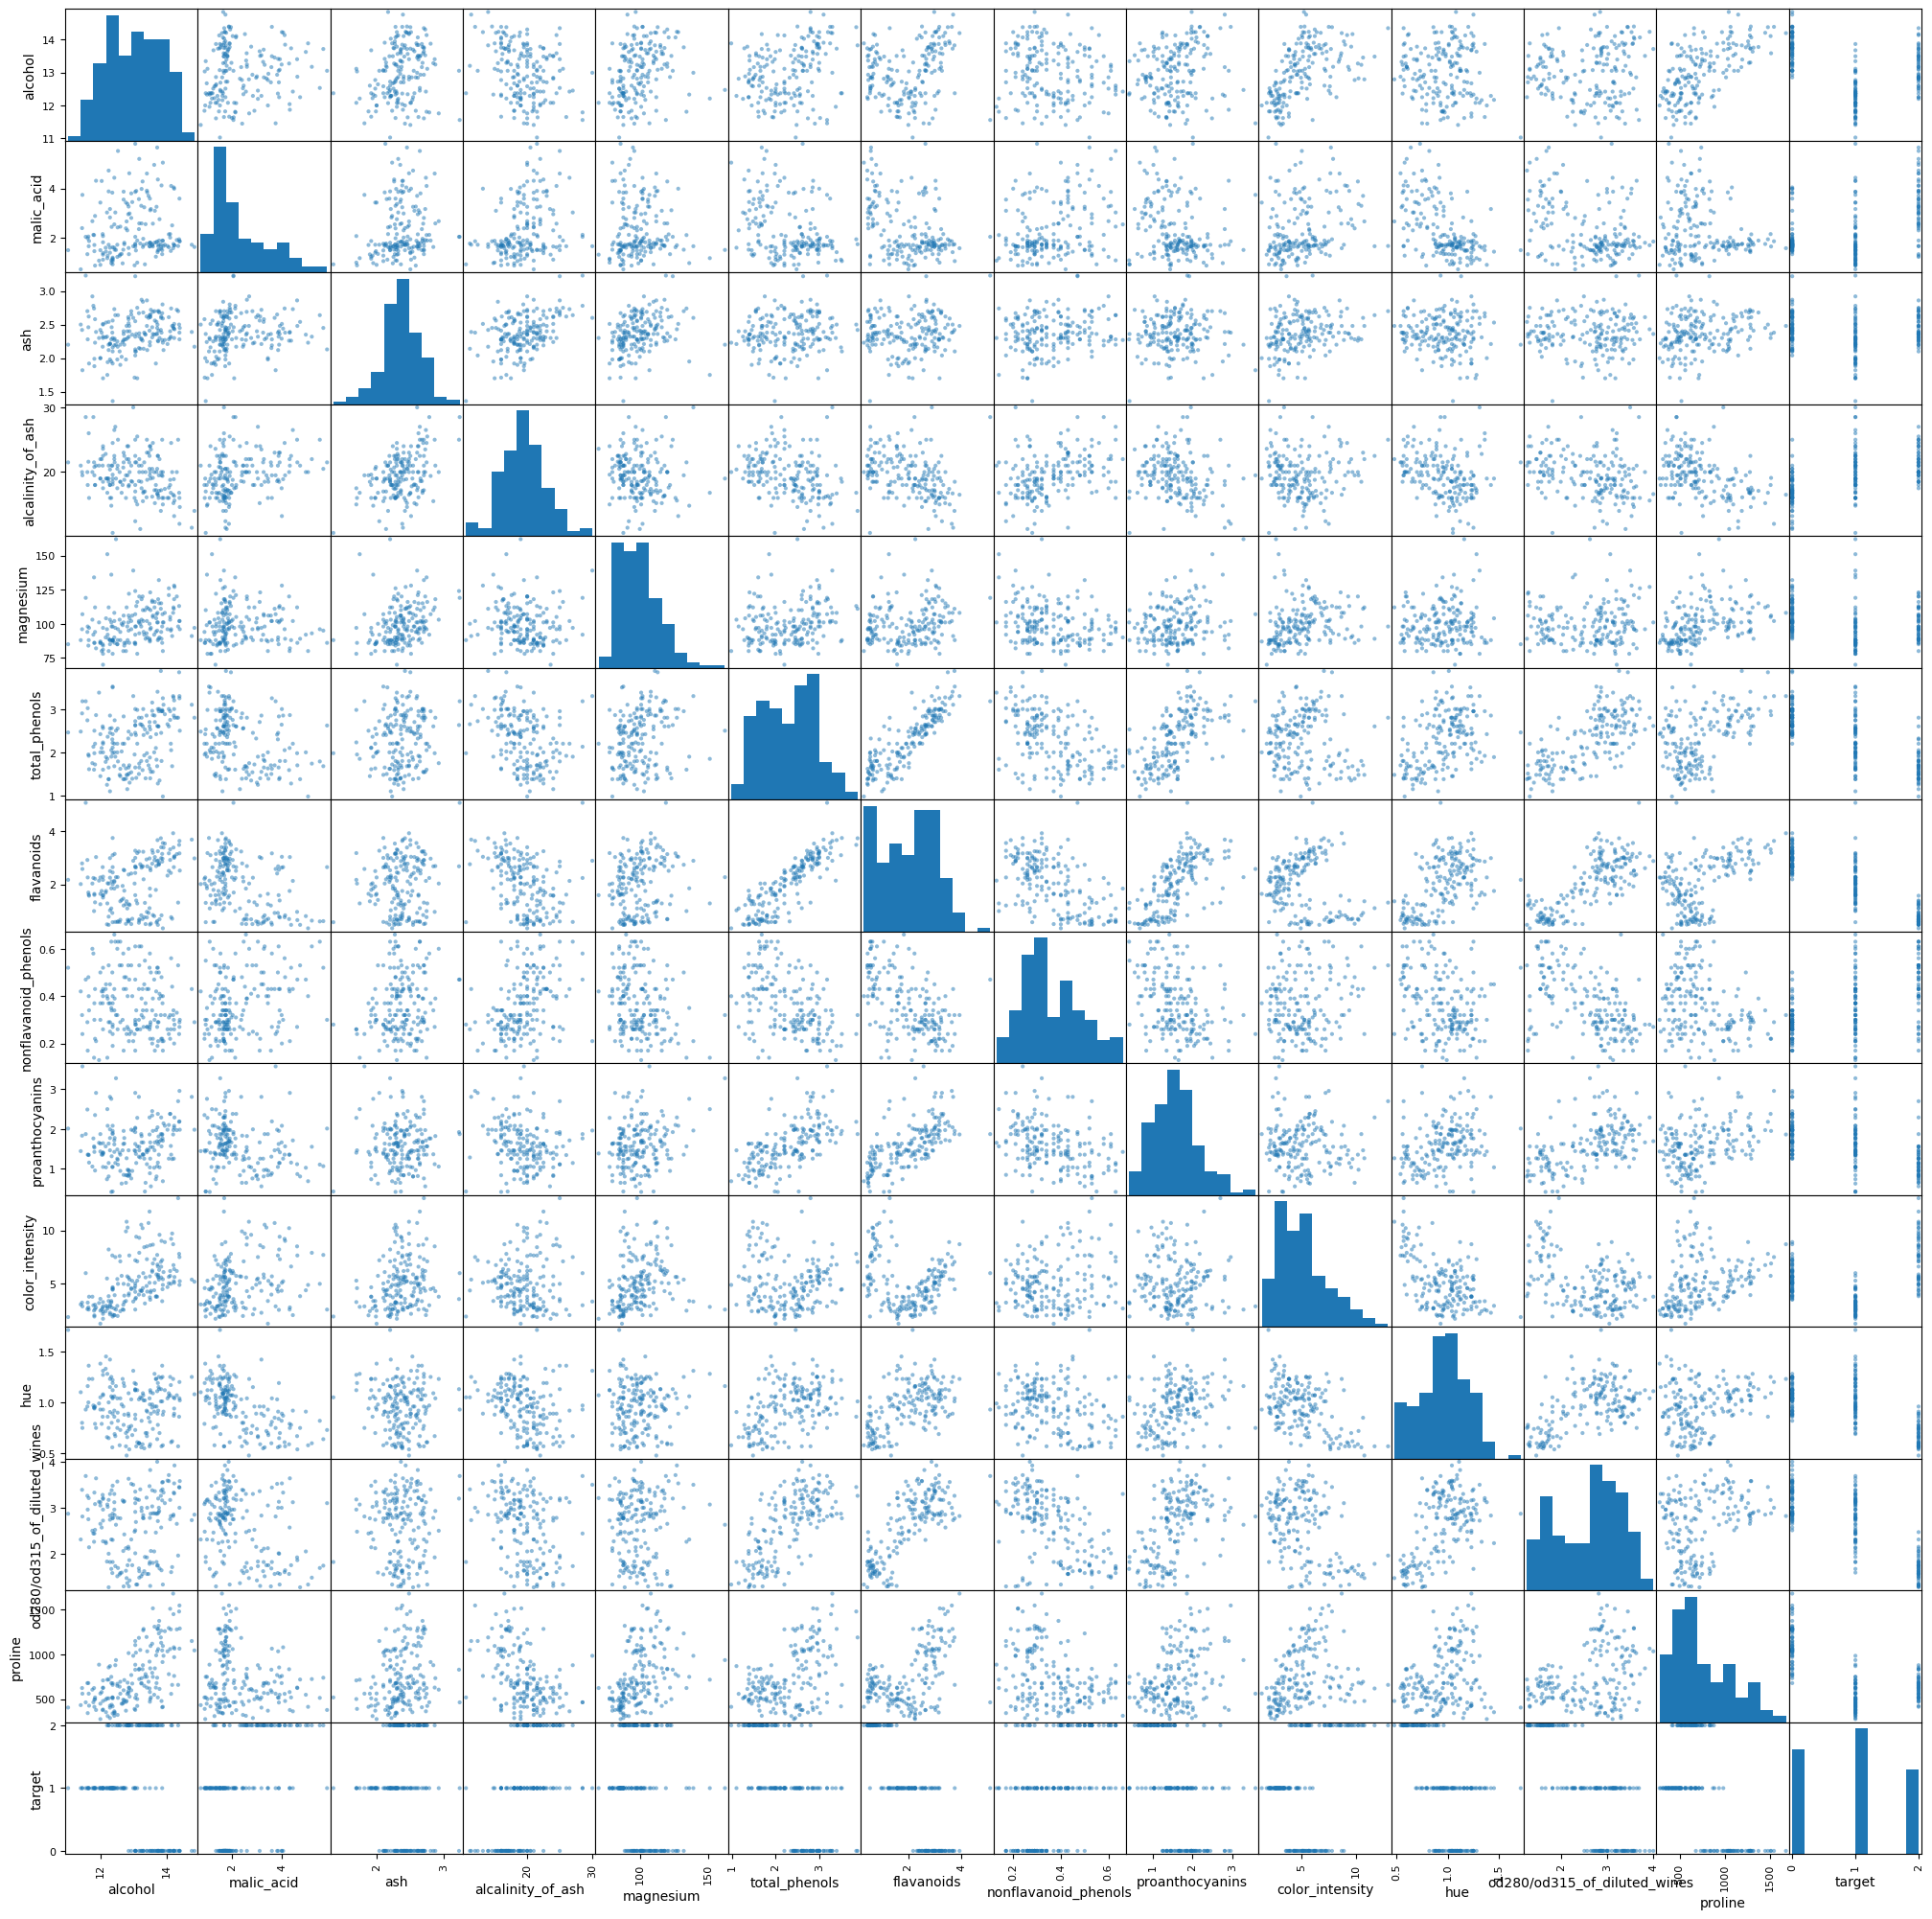

In [443]:
scatter_matrix_pd = pd.plotting.scatter_matrix(frame=frame, figsize=(25, 25))

An alternate scatter matrix can be made using *seaborn's* **pairplot()** function, where the color of each marker corresponds to the target class and the diagonal is the kernel density estimate for each target class.

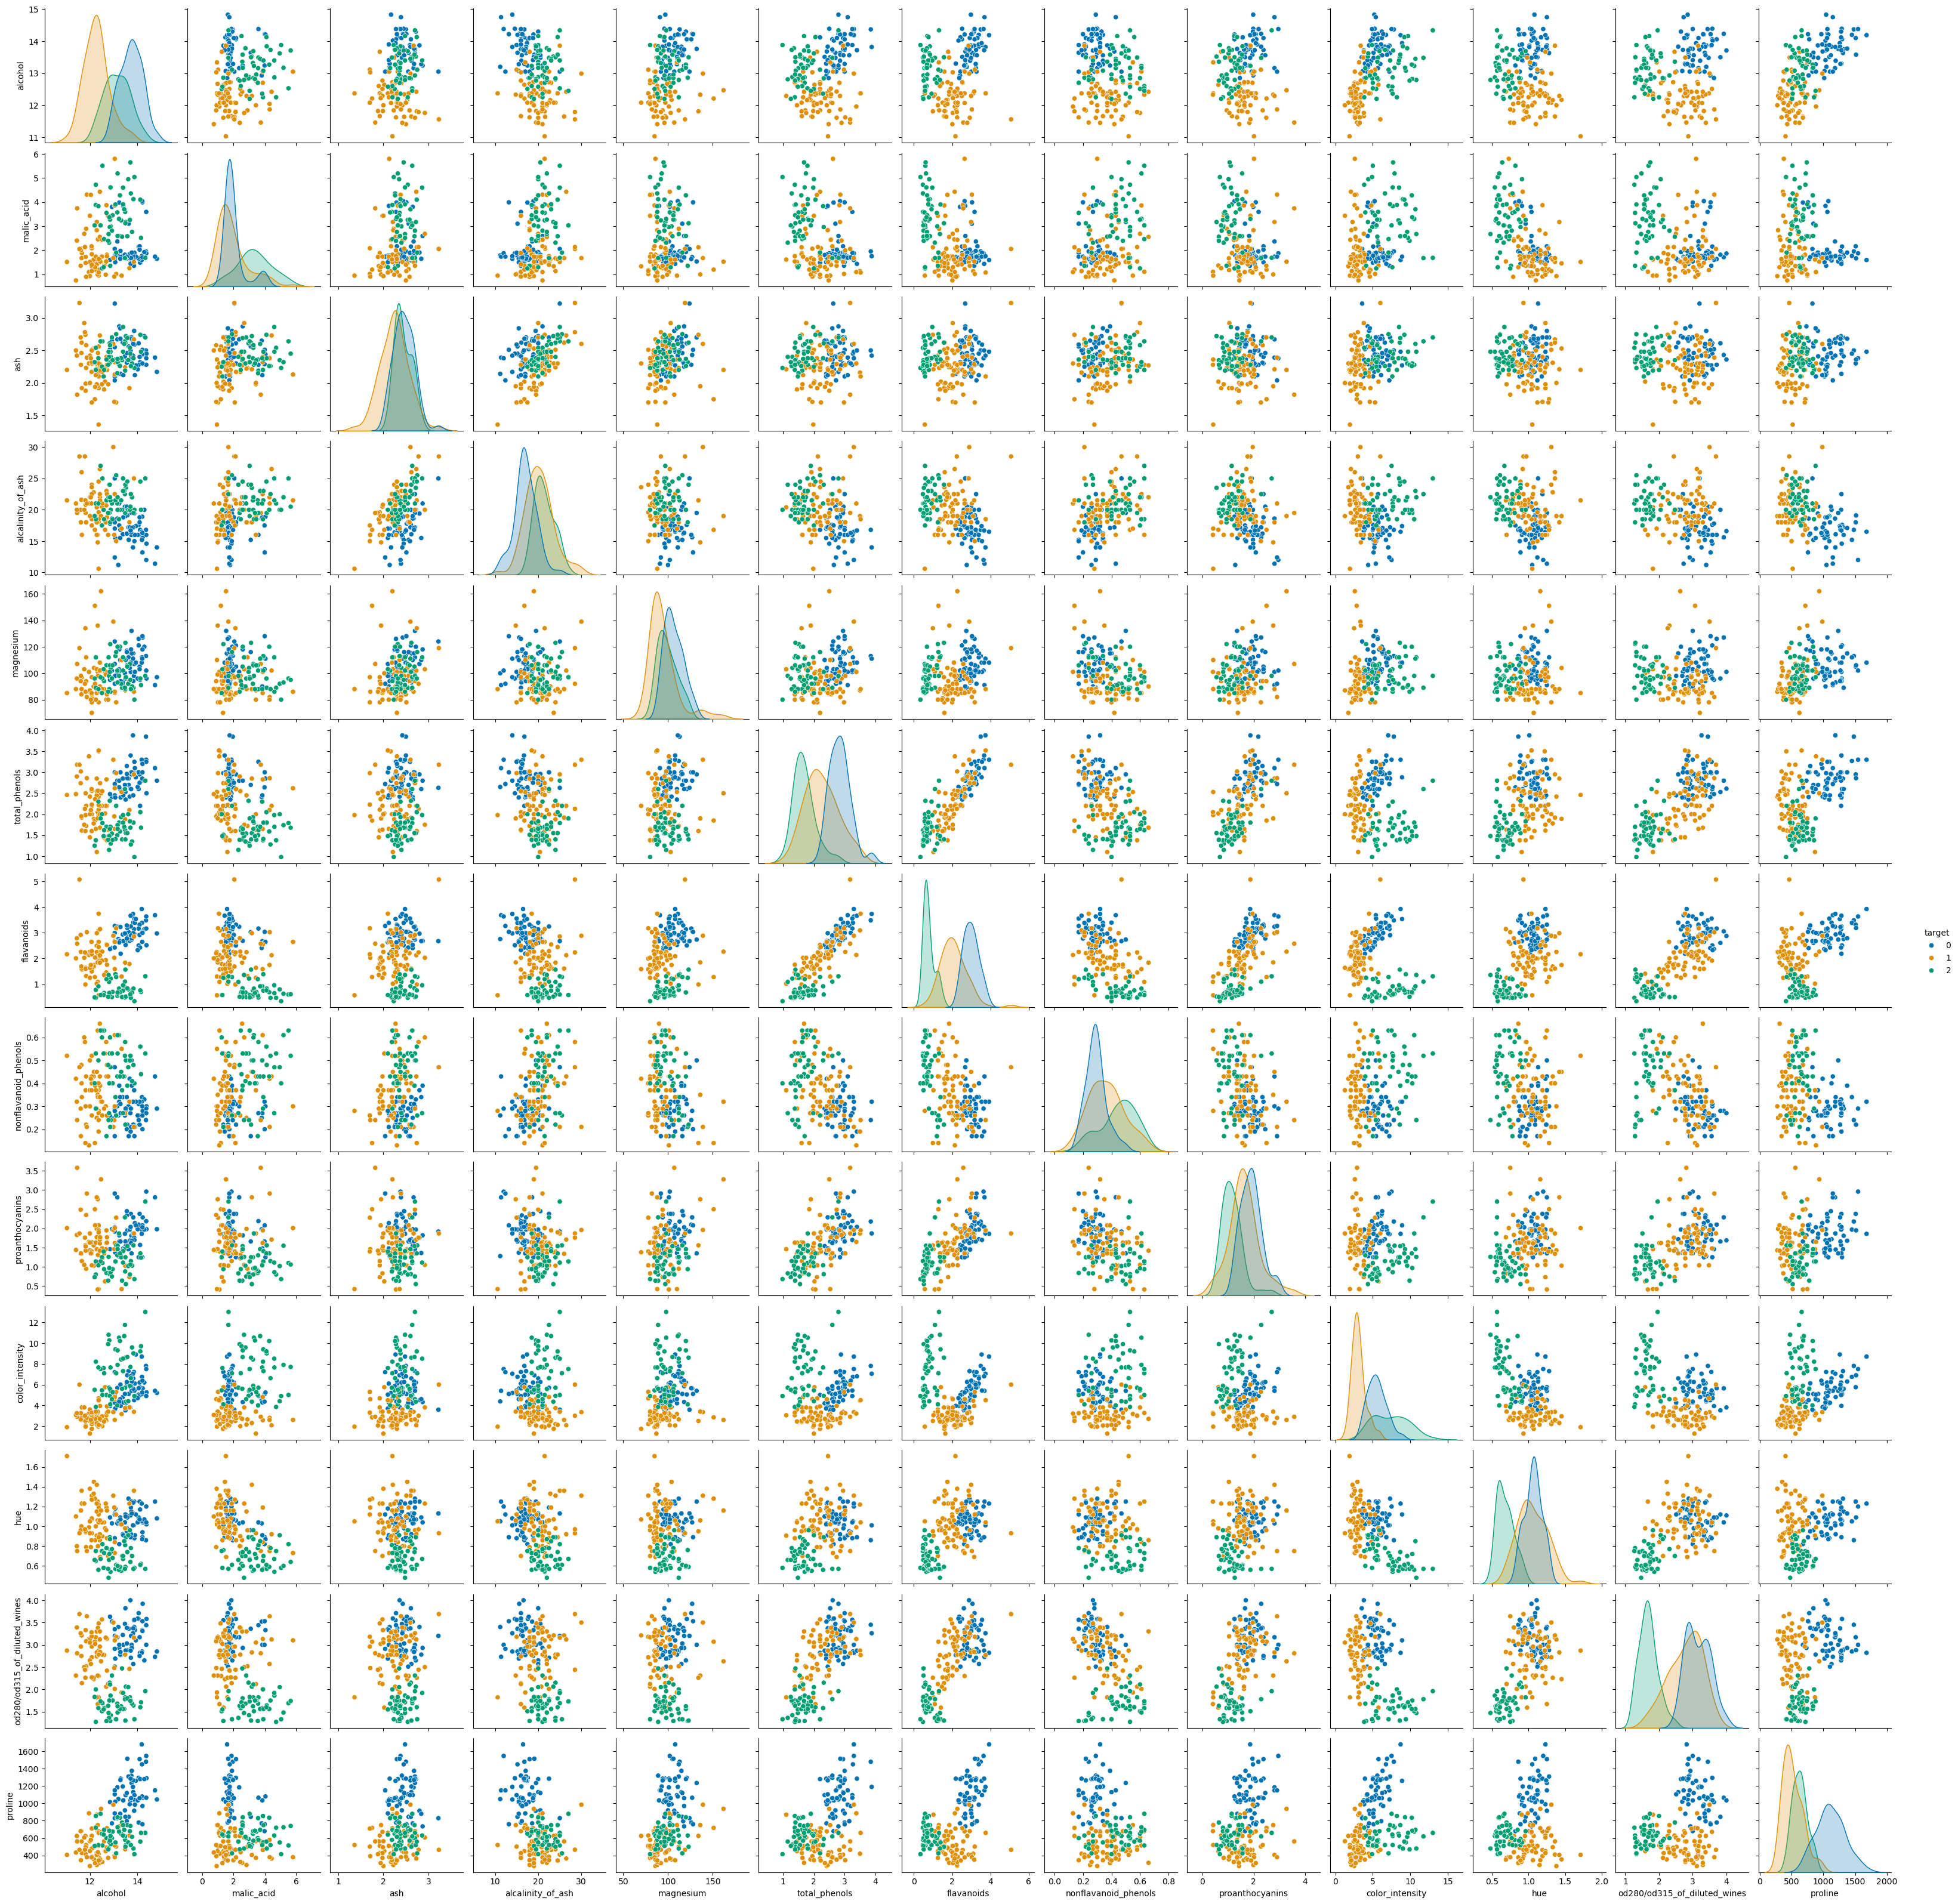

In [444]:
scatter_matrix_sns = sns.pairplot(data=frame, hue='target', palette='colorblind')

**DataFrame.corr()** can be called to numerically assess the correlation of each feature with one another, and with the target classes.

In [445]:
frame.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
target                                 0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
target                         -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

From the correlation matrix, the features with the strongest correlation with the target are:
1. 'flavanoids' (-0.847498)
2. 'od280/od315_of_diluted_wines' (-0.788230)
3. 'total_phenols' (-0.719163)

Between the features themselves, the strongest correlations are:
1. 'total_phenols' with 'flavanoids' (0.864564)
2. 'flavanoids' with 'od280/od315_of_diluted_wines' (0.787194)
3. 'total_phenols' with 'od280/od315_of_diluted_wines' (0.699949)

Next, a K-Nearest Neighbors classifier will be used to classify the data based on the 13 features. 

First, the data must be split into a training set (67%) and test set (33%). This is done using *sklearn's* **train_test_split()** function. 

A random state is specified to ensure that the set does not change with every run.

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The proportion of each class in the training set must be roughly equal to ensure that the classifier is not overfit to one specific class.

In [447]:
y_train.value_counts(normalize=True)

target
1    0.394958
0    0.327731
2    0.277311
Name: proportion, dtype: float64

The classifier is constructed using *sklearn's* **Pipeline** class. This is done because the features must first be scaled for the KNN classifier to work as intended. The **StandardScaler** class is used in this case.

Then, the **KNeighborsClassifier** class is used as the actual classifier. An 'n_neighbors' value of 11 was chosen (rather than the default value of 5) through manual trial, as it minimized the errors in the confusion matrix below.

In [448]:
clf = Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=11))])

Next, the classifier is fit to the training set.

In [449]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

After training, the classifier is used to make predictions on the test set.

In [450]:
y_pred = clf.predict(X_test)

Then, the accuracy of the classifier on the test set is visualized using a confusion matrix.

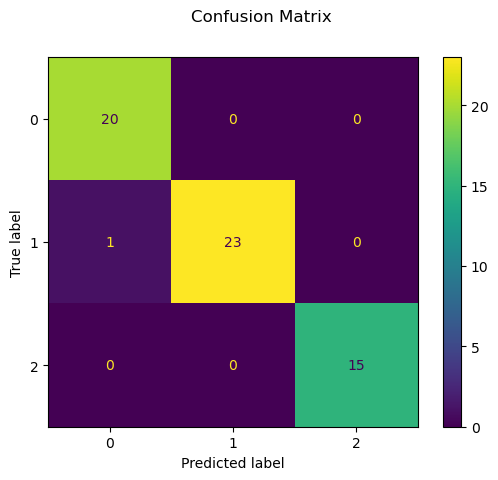

In [451]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
title_text = disp.figure_.suptitle("Confusion Matrix")
disp.ax_.grid(False)

The classifier appears to be well-trained, as evidenced by the high frequency along the diagonal. This indicates that the classifier is able to correctly identify each class equally well, making only a single mistake on the test set.

This can be further verified by calculating the classifier's accuracy, precision, recall, and F1. Macro averaging is used for precision, recall, and F1 as the classifier is nonbinary.

In [452]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n" 
      + f"Precision: {precision_score(y_test, y_pred, average='macro')}\n"
      + f"Recall: {recall_score(y_test, y_pred, average='macro')}\n"
      + f"F1: {f1_score(y_pred, y_test, average='macro')}")

Accuracy: 0.9830508474576272
Precision: 0.9841269841269842
Recall: 0.9861111111111112
F1: 0.9847777201176267


The classifier scores strongly in all areas, again showing its effectiveness.